In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [2]:
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [4]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///../Resources/hawaii.sqlite", echo=False)


In [5]:
# Declare a Base using `automap_base()`
Base = automap_base()

# Use the Base class to reflect the database tables
Base.prepare(engine, autoload_with=engine)


C:\Users\kalis\AppData\Local\Temp\ipykernel_11672\2880897608.py:5: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [6]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [7]:
# Assign the measurement class to a variable called `Measurement` and
# the station class to a variable called `Station`
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create a session
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
most_rec_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_rec_date

('2017-08-23',)

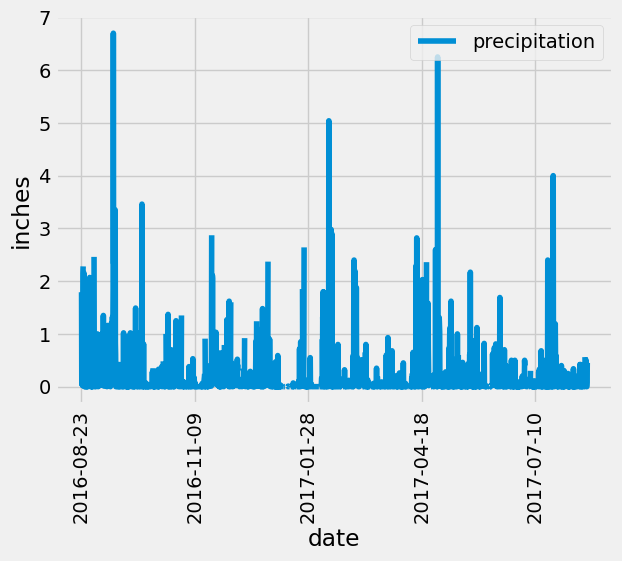

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.
most_rec_date = dt.date(2017, 8, 23)

# Calculate the date one year from the last date in data set.
one_year_ago = most_rec_date - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
prec_12mo = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year_ago).all()

# Save the query results as a Pandas DataFrame and set the column names
prec_12mo_df = pd.DataFrame(prec_12mo, columns=['date', 'precipitation'])

# Sort the dataframe by date
prec_12mo_df = prec_12mo_df.sort_values(by='date')

# Use Pandas Plotting with Matplotlib to plot the data
prec_12mo_df.plot(x='date', y='precipitation', rot=90, title=None)
plt.xlabel('date')
plt.ylabel('inches')
plt.legend(loc='upper right')
plt.show()


In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
prec_12mo_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
stations_ct = session.query(func.count(Station.station)).all()
stations_ct

[(9,)]

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
for row in session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all():
    print(row)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = Station.station == 'USC00519281'
sel =[func.min(Measurement.tobs),
       func.max(Measurement.tobs),
       func.avg(Measurement.tobs)]
session.query(*sel).all()

[(53.0, 87.0, 73.09795396419437)]

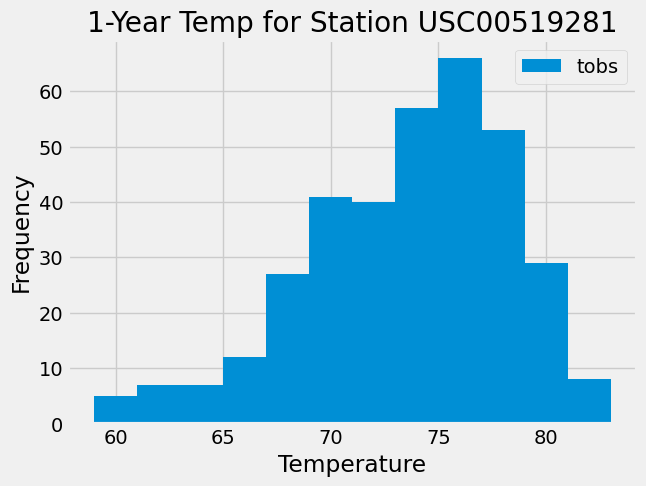

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
sel = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= one_year_ago).all()

df = pd.DataFrame(sel, columns=['date', 'tobs'])
df.set_index('date', inplace=True)
df.hist(bins=12)
plt.tight_layout()
plt.ylabel('Frequency')
plt.xlabel('Temperature')
plt.legend(['tobs'])
plt.title('1-Year Temp for Station USC00519281')
plt.show()


# Close Session

In [16]:
# Close Session
session.close()
